# Study of Embeddings

# Libraries

In [1]:
import torch as th
from fastai.vision.all import *
import cv2
from modules_th.create_embeddings import *
import random
from math import ceil
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
import matplotlib.pyplot as plt

In [2]:
%config Completer.use_jedi = False

In [3]:
th.cuda.set_device(0)

## Utils

In [4]:
def get_embs_paths(path, cat_of_edge_cases=None):
    if cat_of_edge_cases is None: normal_lbls, anom_lbls = ['0'], ['1'] 
    elif cat_of_edge_cases == 1: normal_lbls, anom_lbls = ['0'], ['1', '2']
    elif cat_of_edge_cases == 0: normal_lbls, anom_lbls = ['0', '2'], ['1']
    
    embs = get_files(path, extensions='.pth')
    normal_embs = embs.filter(lambda x: str(x)[-5]in normal_lbls)
    anom_embs = embs.filter(lambda x: str(x)[-5] in anom_lbls)
    return normal_embs, anom_embs

def sample_norm_embs(normal_embs, p):
    assert p < len(normal_embs), f'Not enough normal embs: \n# of normal embs = {len(normal_embs)} \n# of desired training embs = {p}'
    random.shuffle(normal_embs)
    i = ceil(p*len(normal_embs)) if p <= 1 else p
    train_embs, test_embs = normal_embs[:i], normal_embs[i:]
    return train_embs, test_embs

def get_embs(path, cat_of_edge_cases=None):
    normal_embs, anom_embs = get_embs_paths(path, cat_of_edge_cases)
    return normal_embs.map(th.load).map(to_cpu).stack().numpy(), anom_embs.map(th.load).map(to_cpu).stack().numpy()


# (2+1)D SCL fine tuning Kinetics pretraining 

## Isolation Forest 

In [ ]:
normal_embs, anom_embs = get_embs(path, 1)
train_embs, test_embs = sample_norm_embs(normal_embs, .8) 
clf = IsolationForest(contamination='auto')
clf.fit(train_embs)

### ROC curve on all videos

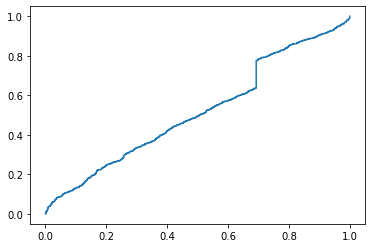

In [268]:
y = np.array(L(1 for el in test_embs)+L(-1 for el in anom_embs))
fpr, tps, ths = roc_curve(y, clf.decision_function(np.concatenate((test_embs,anom_embs))))
plt.plot(fpr, tps)

In [269]:
roc_auc_score(y, clf.decision_function(np.concatenate((test_embs,anom_embs))))

0.5168642662718609

### Anomaly Detection Metrics

## Local Outlier Factor

In [12]:
path = '/mnt/data/eugeniomarinelli/UCF_experiments/embeddings/ucf101_r2p1d50_SCL_20_5'
normal_embs, anom_embs = get_embs(path, 1)
train_embs, test_embs = sample_norm_embs(normal_embs, .8) 
clf = LocalOutlierFactor(metric='cosine', novelty='True')
clf.fit(train_embs)

LocalOutlierFactor(metric='cosine', novelty='True')

### ROC curve on all videos

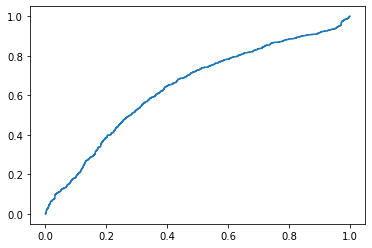

In [13]:
y = np.array(L(1 for el in test_embs)+L(-1 for el in anom_embs))
fpr, tps, ths = roc_curve(y, clf.decision_function(np.concatenate((test_embs,anom_embs))))
plt.plot(fpr, tps)

In [14]:
ect other anomalous events, thereforethey render a limited roc_auc_score(y, clf.decision_function(np.concatenate((test_embs,anom_embs))))

0.6406655345327206

## One Class SVM

In [308]:
220*60

13200

In [304]:
path = '/mnt/data/eugeniomarinelli/UCF_experiments/embeddings/ucf101_r2p1d50_SCL_20_5'
normal_embs, anom_embs = get_embs(path, 1)
train_embs, test_embs = sample_norm_embs(normal_embs, .8) 
clf = OneClassSVM(kernel='rbf')
clf.fit(train_embs)

OneClassSVM()

### Roc curve on all video 

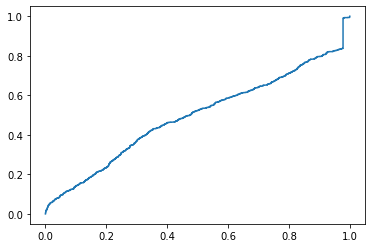

In [305]:
y = np.array(L(1 for el in test_embs)+L(-1 for el in anom_embs))
fpr, tps, ths = roc_curve(y, clf.decision_function(np.concatenate((test_embs,anom_embs))))
plt.plot(fpr, tps)

In [306]:
roc_auc_score(y, clf.decision_function(np.concatenate((test_embs,anom_embs))))

0.49413058577868574

# (2+1)D CEL fine tuning Kinetics pretraining 

In [15]:
path = '/mnt/data/eugeniomarinelli/UCF_experiments/embeddings/ucf101_r2p1d50_CEL_20_5'

## Isolation Forest 

In [204]:
normal_embs, anom_embs = get_embs(path, 1)
train_embs, test_embs = sample_norm_embs(normal_embs, .4) 
clf = IsolationForest(contamination='auto')
clf.fit(train_embs)

IsolationForest()

### ROC curve on all videos

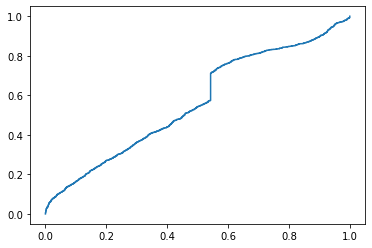

In [205]:
y = np.array(L(1 for el in test_embs)+L(-1 for el in anom_embs))
fpr, tps, ths = roc_curve(y, clf.decision_function(np.concatenate((test_embs,anom_embs))))
plt.plot(fpr, tps)

In [206]:
roc_auc_score(y, clf.decision_function(np.concatenate((test_embs,anom_embs))))

0.5629236345583537

### Anomaly Detection Metrics

## Local Outlier Factor

In [17]:
path = '/mnt/data/eugeniomarinelli/UCF_experiments/embeddings/ucf101_r2p1d50_CEL_20_5'
normal_embs, anom_embs = get_embs(path, 1)
train_embs, test_embs = sample_norm_embs(normal_embs, .8) 
clf = LocalOutlierFactor(metric='cosine', novelty='True')
clf.fit(train_embs)

LocalOutlierFactor(metric='cosine', novelty='True')

### Roc curve on all video 

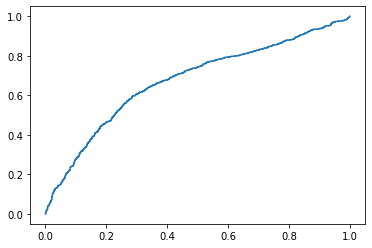

In [18]:
y = np.array(L(1 for el in test_embs)+L(-1 for el in anom_embs))
fpr, tps, ths = roc_curve(y, clf.decision_function(np.concatenate((test_embs,anom_embs))))
plt.plot(fpr, tps)

In [19]:
roc_auc_score(y, clf.decision_function(np.concatenate((test_embs,anom_embs))))

0.6735332593335167

## One Class SVM

In [289]:
path = '/mnt/data/eugeniomarinelli/UCF_experiments/embeddings/ucf101_r2p1d50_CEL_20_5'
normal_embs, anom_embs = get_embs(path, 1)
train_embs, test_embs = sample_norm_embs(normal_embs, .8) 
clf = OneClassSVM(kernel='rbf')
clf.fit(train_embs)

OneClassSVM()

### Roc curve on all video 

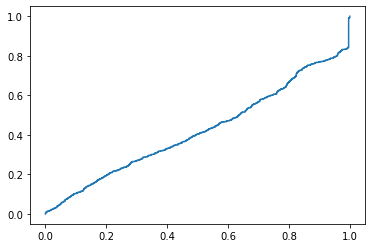

In [290]:
y = np.array(L(1 for el in test_embs)+L(-1 for el in anom_embs))
fpr, tps, ths = roc_curve(y, clf.decision_function(np.concatenate((test_embs,anom_embs))))
plt.plot(fpr, tps)

In [291]:
roc_auc_score(y, clf.decision_function(np.concatenate((test_embs,anom_embs))))

0.4198435376558275

# (2+1)D SimCLR unsupervised fine tuning Kinetics pretraining 

## Isolation Forest 

In [17]:
path = '/mnt/data/eugeniomarinelli/UCF_experiments/embeddings/crimes_r2p1d50_unsup_40_5'
normal_embs, anom_embs = get_embs(path, 1)
train_embs, test_embs = sample_norm_embs(normal_embs, .8) 
clf = IsolationForest(contamination='auto')
clf.fit(train_embs)

IsolationForest()

### ROC curve on all videos

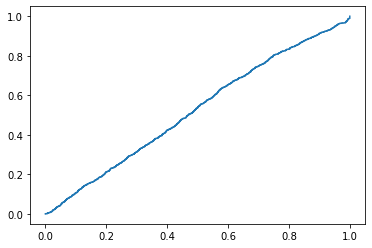

In [6]:
y = np.array(L(1 for el in test_embs)+L(-1 for el in anom_embs))
fpr, tps, ths = roc_curve(y, clf.decision_function(np.concatenate((test_embs,anom_embs))))
plt.plot(fpr, tps)

In [7]:
roc_auc_score(y, clf.decision_function(np.concatenate((test_embs,anom_embs))))

0.5224642255892256

### Anomaly Detection Metrics

## Local Outlier Factor

In [18]:
path = '/mnt/data/eugeniomarinelli/UCF_experiments/embeddings/crimes_r2p1d50_unsup_90_10_embs128'
normal_embs, anom_embs = get_embs(path, 1)
train_embs, test_embs = sample_norm_embs(normal_embs, .8) 
clf = LocalOutlierFactor(metric='cosine', novelty='True')
clf.fit(train_embs)

LocalOutlierFactor(metric='cosine', novelty='True')

### ROC curve on all videos

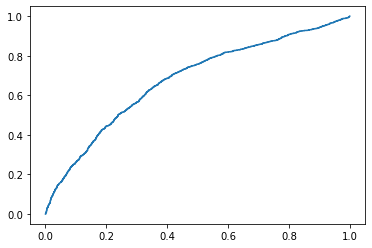

In [19]:
y = np.array(L(1 for el in test_embs)+L(-1 for el in anom_embs))
fpr, tps, ths = roc_curve(y, clf.decision_function(np.concatenate((test_embs,anom_embs))))
plt.plot(fpr, tps)

In [20]:
roc_auc_score(y, clf.decision_function(np.concatenate((test_embs,anom_embs))))

0.6771115865444569

## One Class SVM

In [21]:
path = '/mnt/data/eugeniomarinelli/UCF_experiments/embeddings/crimes_r2p1d50_unsup_90_10_embs128'
normal_embs, anom_embs = get_embs(path, 1)
train_embs, test_embs = sample_norm_embs(normal_embs, .8) 
clf = OneClassSVM(kernel='rbf')
clf.fit(train_embs)

OneClassSVM()

### Roc curve on all video 

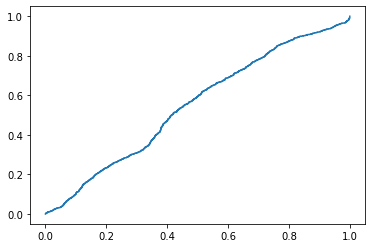

In [22]:
y = np.array(L(1 for el in test_embs)+L(-1 for el in anom_embs))
fpr, tps, ths = roc_curve(y, clf.decision_function(np.concatenate((test_embs,anom_embs))))
plt.plot(fpr, tps)

In [23]:
roc_auc_score(y, clf.decision_function(np.concatenate((test_embs,anom_embs))))

0.5473918389138297

## Create embeddings


In [2]:
import torch

In [7]:
model = torch.load('/mnt/data/eugeniomarinelli/UCF_experiments/trained_models_cnn/models/model_ucfCrimes_r2p1d50_K_unsup_100ep.pth')
model = model.eval().cuda()
save_path = Path('/mnt/data/eugeniomarinelli/UCF_experiments/embeddings/crimes_r2p1d50_unsup_90_10')

In [16]:
#df = pd.read_csv('/mnt/data/eugeniomarinelli/UCF_Crimes/Temporal_Anomaly_Annotation.csv', index_col=0)
#df = df[df.anomaly!='Normal']
# df = df[2:3]


mean = [0.4345, 0.4051, 0.3775]
std = [0.2768, 0.2713, 0.2737]

bs, size, l, skip = 32, 224, 16, 2
pl = Pipeline([PILImage.create,
               Resize(size, method=ResizeMethod.Pad), 
               ToTensor(), 
               IntToFloatTensor(), 
               Normalize.from_stats(mean,std, cuda=False)])

try: 
    with torch.no_grad():
        create_embeddings(df, model, pl, bs, size, l, skip, save_path)
except: vidcap.release(); raise Exception()

In [15]:
#df=df.loc[(df.anomaly== "Shooting")|(df.anomaly== "Shoplifting")|(df.anomaly== "Stealing")|(df.anomaly== "Stealing")]